In [1]:
!pip install -q datasets tqdm

In [2]:
from datasets import load_dataset
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
HF_DATASET_PATH = "sdelowar2/optimized_product_reviews_with_insight"
DATASET_SPLIT = "train"

In [24]:
# Step 4: Load dataset from Hugging Face Hub
print("🚀 Loading dataset from Hugging Face Hub...")
dataset = load_dataset(HF_DATASET_PATH, split=DATASET_SPLIT)
print(f"✅ Loaded {len(dataset)} examples")

🚀 Loading dataset from Hugging Face Hub...


README.md:   0%|          | 0.00/349 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/2.07M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3000 [00:00<?, ? examples/s]

✅ Loaded 3000 examples


In [25]:
!pip install tiktoken -q

In [26]:
import tiktoken

enc = tiktoken.get_encoding("cl100k_base")

In [27]:
# Utils

# Format as chat message
def format_as_messages(example: dict) -> dict:
    """Convert a dataset example into a structured chat format."""

    review_text = "\n".join([f"- {r}" for r in example["input"]])
    user_prompt = f"Instruction: {example['instruction']}\nReviews:\n{review_text}"
    return {
        "messages": [
            {"role": "system", "content": "You are an assistant that extracts pros and cons from product reviews."},
            {"role": "user", "content": user_prompt},
            {"role": "assistant", "content": example["answer"]}
        ]
    }



# Count tokens in messages
def get_token_counts(ds_formatted_messages):

  messages_tokens_count = []

  for sample in ds_formatted_messages:
    messages = sample["messages"]
    tokens_count = len(enc.encode(str(messages)))
    messages_tokens_count.append(tokens_count)

  return messages_tokens_count

In [28]:
# Util for plotting his and box plots

def plot_counts(count_list, title_hist, x_label_hist, y_label_hist, title_box, x_label_box):
  # Create subplots side by side
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

  # Histogram on the left
  ax1.hist(count_list, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
  ax1.set_title(title_hist)
  ax1.set_xlabel(x_label_hist)
  ax1.set_ylabel(y_label_hist)
  ax1.grid(True, alpha=0.3)

  # Box plot on the right
  sns.boxplot(x=count_list, ax=ax2)
  ax2.set_title(title_box)
  ax2.set_xlabel(x_label_box)

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Show both plots
  plt.show()

## Words and Tokens in Single Review

In [29]:
single_review_total_words = []
single_review_total_tokens = []

for sample in dataset:
  review_list = sample["input"]

  for review in review_list:
      words_count = len(review.split())
      tokens_count = len(enc.encode(review))
      single_review_total_words.append(words_count)
      single_review_total_tokens.append(tokens_count)

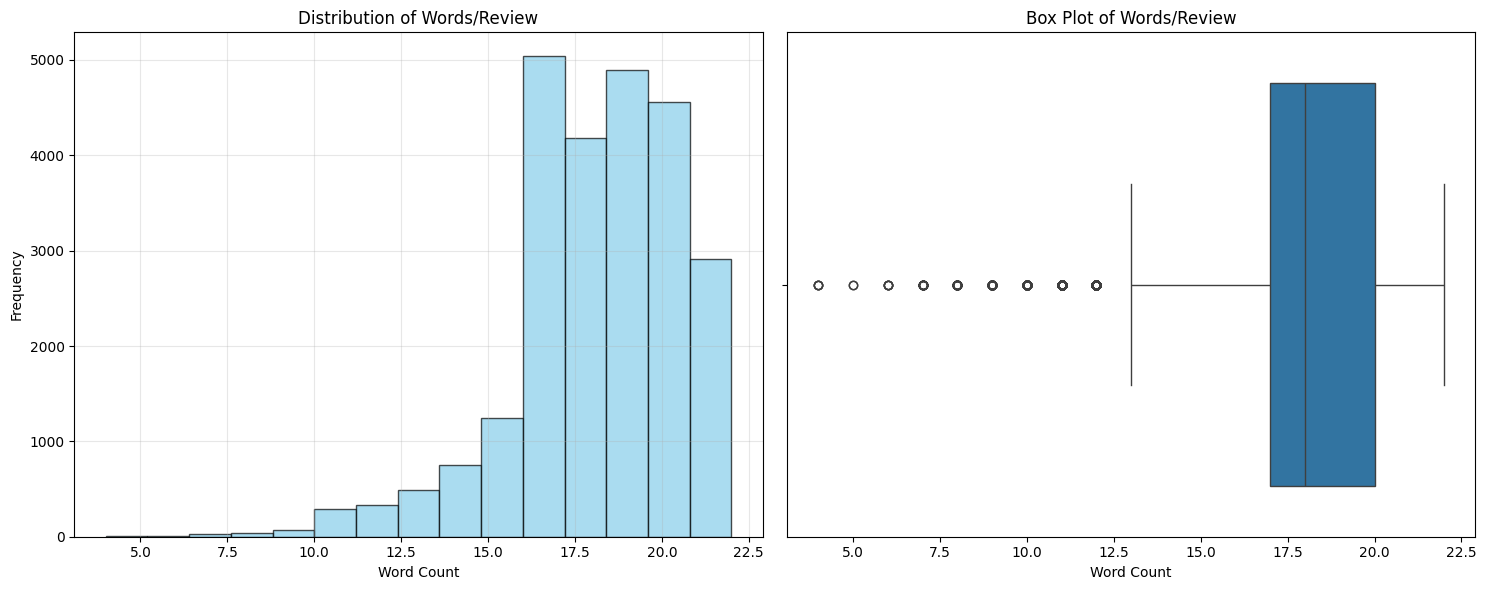

In [30]:
# Ploting the distribution of words per review
plot_counts(single_review_total_words,
            title_hist= "Distribution of Words/Review",
            x_label_hist="Word Count"
            , y_label_hist="Frequency",
            title_box="Box Plot of Words/Review",
            x_label_box="Word Count")

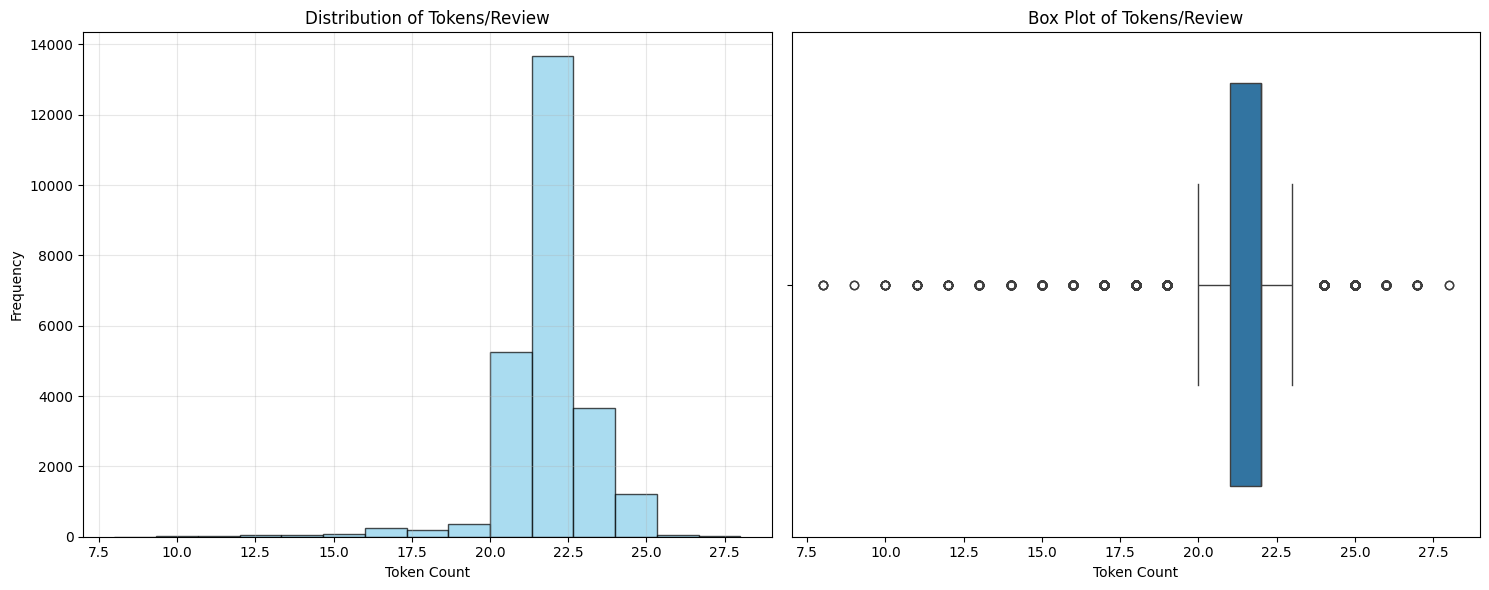

In [31]:
# Ploting the distribution of tokens per review
plot_counts(single_review_total_tokens,
            title_hist= "Distribution of Tokens/Review",
            x_label_hist="Token Count"
            , y_label_hist="Frequency",
            title_box="Box Plot of Tokens/Review",
            x_label_box="Token Count")

In [32]:
len(single_review_total_tokens)

24852

## Token Distribution in prompt (Chat_template) in the Dataset

In [33]:
ds_formatted_messages = dataset.map(format_as_messages)

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [34]:
ds_formatted_messages[0]

{'instruction': 'Generate pros and cons from the following product reviews.',
 'input': ['I am using this with a Nook HD+. It works as described. The HD picture on my Samsung 52',
  'The price is completely unfair and only works with the Nook HD and HD+. The cable is very wobb',
  'This adaptor is real easy to setup and use right out of the box. I had not problem with it',
  'This adapter easily connects my Nook HD 7&#34; to my HDTV through the HDMI cable.',
  'Gave it five stars because it really is nice to extend the screen and use your Nook as a streaming'],
 'answer': '{"pros": ["Excellent HD picture quality", "Easy to set up and use", "Good for traveling", "Works well with Nook HD series", "Allows streaming to TV"], "cons": ["Cable connection is wobbly", "Price is considered unfair", "Requires power adapter to function", "Not compatible with standard Nook", "Loose plug connection"]}',
 'messages': [{'content': 'You are an assistant that extracts pros and cons from product reviews.

In [35]:
prompts_token_counts = get_token_counts(ds_formatted_messages)

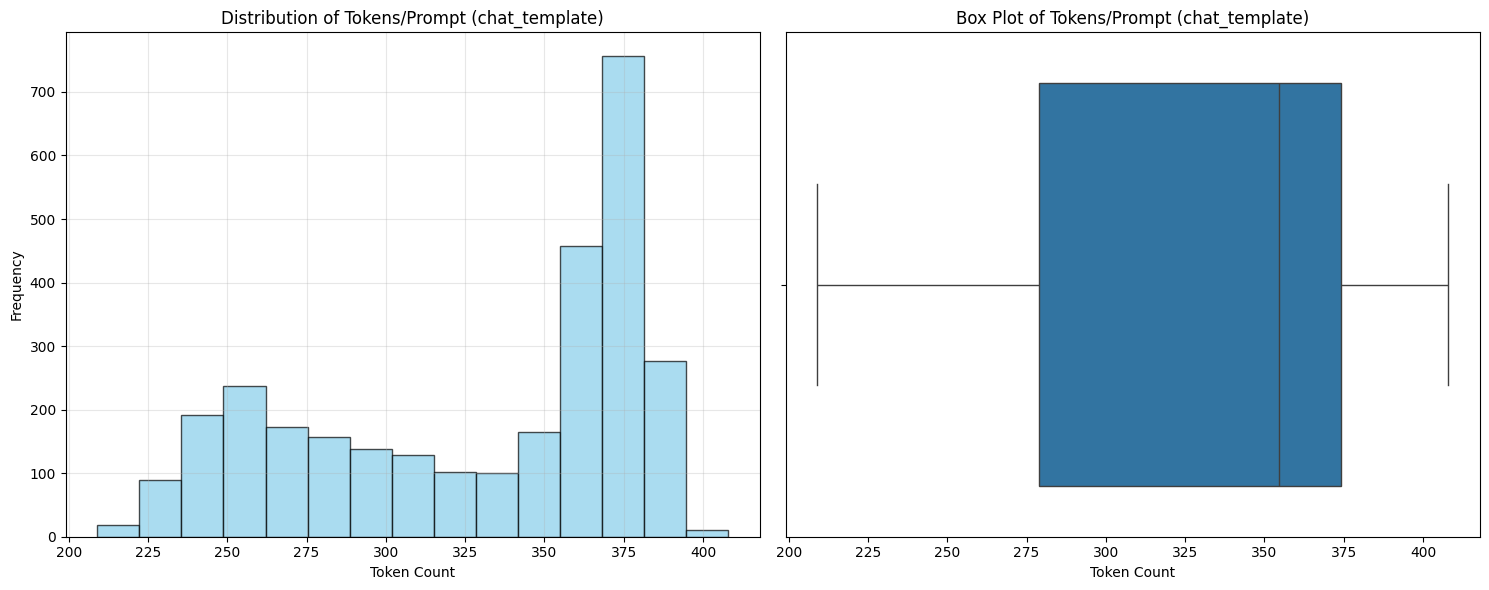

In [36]:
# Ploting the distribution of tokens per input Prompt
plot_counts(prompts_token_counts,
            title_hist= "Distribution of Tokens/Prompt (chat_template)",
            x_label_hist="Token Count"
            , y_label_hist="Frequency",
            title_box="Box Plot of Tokens/Prompt (chat_template)",
            x_label_box="Token Count")

In [37]:
max(prompts_token_counts)

408